# Classification Exercise
## 95-791 Data Mining (Fall 2021) 
#### Date: Tuesday, November 9th


### Changing the author field and file name.

 (a) Change the `name:` field on the ipynb document from Your Name Here to your own name.

 (b) Rename this file to "Classification_A2_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this exercise make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.style.use('seaborn-white')

The dataset - Heart failure clinical records Data Set- we will be working with comes from UCI's Machine Learning Repository. 

This dataset contains thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)

Target
- death event: if the patient deceased during the follow-up period (boolean)

**Read the dataset and print the first 5 rows**

In [2]:
#your code here
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')
print(df.head(5))

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium sex  \
0                    1  265000.00               1.9           130   F   
1                    0  263358.03               1.1           136   F   
2                    0  162000.00               1.3           129   F   
3                    0  210000.00               1.9           137   F   
4                    0  327000.00               2.7           116   M   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1    

**Check if there are any missing values**

In [20]:
#your code here
df.dropna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,F,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,F,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,F,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,F,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,M,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,F,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,M,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,M,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,F,1,280,0


**Before you go into modeling your data, you will need to turn `sex` into a numerical/binary columns.**

**Hint: the easiest way would be to create [dummy variables](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [21]:
#your code here
df = pd.get_dummies(df, columns=['sex'])
print(df.head(5))

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  smoking  \
0                    1  265000.00               1.9           130        0   
1                    0  263358.03               1.1           136        0   
2                    0  162000.00               1.3           129        1   
3                    0  210000.00               1.9           137        0   
4                    0  327000.00               2.7           116        0   

   time  DEATH_EVENT  sex_F  sex_M  
0     4            1      1      0  
1     

**We now need to divide our dataset into `X` and `y`.**

In [22]:
#your code here
X = df.drop(['DEATH_EVENT'], axis=1)
X = X.drop(['sex_F'], axis = 1)
y = df['DEATH_EVENT']

**As any other classification or regression problem we are going to split our dataset into train and test datasets. Use a 20-80 ratio**

In [23]:
#your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

---

### KNN

We are going to try a kNN (k-Nearest Naighbours) as our first classifier You can read more about it [here](https://scikit-learn.org/stable/modules/neighbors.html) or in last lecture slides. These will be explained in detail during Monday's class. We can use KNN for classification, as well as regression and unsupervised learning. Take a look at the documentation for the KNN Classifier in [scikitlearn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

There are default parameter for the KNNClassifier:
- k=5 (Number of neighbors to use by default for kneighbors queries)
- weights = ’uniform’ (All points in each neighborhood are weighted equally)
- metric = ’minkowski’ (metric used to calculate [distances](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric)) 
    - 	sum(|x - y|^p)^(1/p)  --> if p=2, then this is equivalent to the Euclidean distance. By default p=2


In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

**We first fit our KNN Classifier with our training data, and we will start by using the default number of neighbours.**

In [25]:
#your code here
knn = KNeighborsClassifier()

**We test our classifier with X_test, get their predictions. Use your test dataset to predict with your KNN classifier**

In [26]:
#your code here
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Now we need to know how good was that classification!**

$$Accuracy = \frac{TP + TN}{n}$$

Use your metrics.accuracy_score to obtain an accuracy score on your previous predictions

In [31]:
#your code here
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.6333333333333333

We can also calculate the confusion matrix for the classification we just performed.


| Predicted\Observed     | Event | Non-event   |
| :---        |    :----:   |          ---: |
| Event    | TP      | FP  |
| Non-event   | FN       | TN    |

**Calculate the [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) based on your y_test and your predictions. Print out your results.**

In [45]:
#your code here
c_matrix = confusion_matrix(y_test, y_pred)
print(c_matrix)

[[45  1]
 [ 3 11]]


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77        46
           1       0.10      0.07      0.08        14

    accuracy                           0.63        60
   macro avg       0.42      0.44      0.43        60
weighted avg       0.59      0.63      0.61        60



**Are both your classes classified the same? Is there one harder to classify?**

--> your answer here
I dont know how to answer this question

During last week's lectures we talked about the metrics you see in the classification report. Their definition are below.

$$Recall = \frac{TP}{TP + FN}$$

$$Precision = \frac{TP}{TP + FP} $$

$$F_1 = 2•\frac{precision•recall}{precision+recall} $$ Read more abiut the f1-score [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

**Use the [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) to plot your confusion matrix and appropriate labels. After calculated it do a `.plot()` on it**

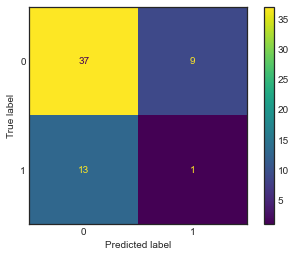

In [38]:
#your code here
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()

**How does this plot help us?**

--> your answer here
I don' know how to interpret this

**As a final task use the [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) to print out each of these metrics seperately**

In [39]:
#your code here
metrics.accuracy_score(y_test, y_pred)

0.6333333333333333

In [41]:
metrics.precision_score(y_test, y_pred, average=None)

array([0.74, 0.1 ])

---

### Naive Bayes

Let's try a different classifier with the same dataset. This time we'll try a [Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [42]:
from sklearn.naive_bayes import GaussianNB

**We need to fit a Naive Bayes classifier to our data. We will use X_test to make predictions with our classifier and print out its confusion matrix**

As you might have already figured out, most scikit-learn models are classes, therefore we need:
- Create an object if that class
- Fit our train data to that object (to create a model)
- Use our model to predict on our test data

After these three steos you can use your predictions to create a confusion matrix and a classification report.

In [43]:
#your code here
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9333333333333333

**How well did this model do compared to KNN?**

--> your answer here
Better

**Use the ConfusionMatrixDisplay on your confusion matrix**

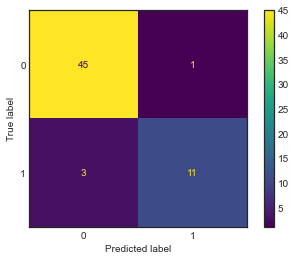

In [46]:
#your code here
c_matrix1 = confusion_matrix(y_test, y_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=c_matrix1, display_labels=gnb.classes_)
disp1.plot()
plt.show()

---

## STOP HERE

We need to go over Logistic Regression before we get to the next part.


---

### Logistic Regression

**Let's try a third classifier with the same dataset. This time we'll try a [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)**

In [17]:
from sklearn.linear_model import LogisticRegression

**We need to fit a LogisticRegression to our data. We will use X_test to make predictions with our classifier and print out its confusion matrix**

As you might have already figured out, most scikit-learn models are classes, therefore we need:
- Create an object if that class
- Fit our train data to that object (to create a model)
- Use our model to predict on our test data

After these three steos you can use your predictions to create a confusion matrix and a classification report.

*Warning: you might get a "TOTAL NO. of ITERATIONS REACHED LIMIT." error when running this model. If this happens consider increasing the `max_iter` for the `LogisticRegression`.*

In [18]:
#your code here

**Use the ConfusionMatrixDisplay on your confusion matrix**

In [19]:
#your code here

**How well did this model do compared to Naive Bayes?**

--> your answer here

**Overall which model (KNN, NB and LR) did better with this dataset?**

--> your answer here